<a href="https://colab.research.google.com/github/vedashrith/Data-Science/blob/main/1985AutoImportsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1. Data from our lives
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

In a daily life scenario such as estimating monthly expenses, regression analysis can help estimate the monthly expenses. The predictors that can be used in a regression model are:  
* Apartment rent: The monthly rent of an apartment. Larger apartments tends to have higher prices.
* Electricity bill: Electricity consumption varies based on every day usage and also on air conditioner usage during summers and winters and also other appliances.
* Water bill: Water consumption also impacts on the water bill.
* Groceries: Groceries are also a part of living expenses such as food and basic amenities.
* Wifi and Phone bill: If we use same service for both phone and wifi we pay for what we use.
* Personal expenses: eating out, going for movies and shopping also contribute to living expenses.  

By collecting the data on these  predictors and using a regression model we can predict the expenses for next month and make more informed decisions while spending money.


## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [ ]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [ ]:
df.dtypes

fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object

The function df.dtypes can be used to get the datatypes of variables.  
* In the given dataset, the variables: fuel_type, body, engine_type, cylinders, bore, stroke, horse_power and peak_rpm are the object types.
* Float64 type variables are wheel_base, length, width, heights and comprassion.
* Last but not least, variables named curb_weight, city_mpg, highway_mpg and price are int64 type variables.  

In the above variables: bore, stroke, horse_power and peak_rpm are object data types but actually the data is float type. This can be caused due to char data such as "?" in the respective columns of the above variables.

### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [ ]:
## Your code here
df['bore'] = pd.to_numeric(df['bore'], errors = 'coerce').astype('float64')
df['stroke'] = pd.to_numeric(df['stroke'], errors = 'coerce').astype('float64')
df['horse_power'] = pd.to_numeric(df['horse_power'], errors = 'coerce').astype('float64')
df['peak_rpm'] = pd.to_numeric(df['peak_rpm'], errors = 'coerce').astype('float64')

The .to_numeric can be used with .astype('float64') to explicitly convert datatype into float64, whereas the errors = 'coerce' indicates that unknown values such as "?" to be replaced with Nan values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [ ]:
## Your code here
df2 = df.drop(['body', 'engine_type', 'cylinders'], axis=1)

We are dropped the categorical datatypes from the dataframe.

In [ ]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Drop all nan values

In [ ]:
## your code goes here
df2 = df2.dropna()

The null values are dropped to reduce bias in the data.

In [ ]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [ ]:
## Your code goes here
df2 = pd.get_dummies(df2, columns=['fuel_type'], prefix='fuel', drop_first=True)

Since there are two types of options for fuel_type i.e., gas and diesel. we can replace that with binary values '1' for gas and '0' for diesel which saves a lot of memory.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel_base   195 non-null    float64
 1   length       195 non-null    float64
 2   width        195 non-null    float64
 3   heights      195 non-null    float64
 4   curb_weight  195 non-null    int64  
 5   engine_size  195 non-null    int64  
 6   bore         195 non-null    float64
 7   stroke       195 non-null    float64
 8   comprassion  195 non-null    float64
 9   horse_power  195 non-null    float64
 10  peak_rpm     195 non-null    float64
 11  city_mpg     195 non-null    int64  
 12  highway_mpg  195 non-null    int64  
 13  price        195 non-null    int64  
 14  fuel_gas     195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


In [ ]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


In [ ]:
#1.shape of data
df2.shape

(195, 15)

The .shape function returns the numbers rows and columns in the dataset. We can see that there are 195 rows and 15 columns in the dataframe df2 after data manipulation step.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel_base   195 non-null    float64
 1   length       195 non-null    float64
 2   width        195 non-null    float64
 3   heights      195 non-null    float64
 4   curb_weight  195 non-null    int64  
 5   engine_size  195 non-null    int64  
 6   bore         195 non-null    float64
 7   stroke       195 non-null    float64
 8   comprassion  195 non-null    float64
 9   horse_power  195 non-null    float64
 10  peak_rpm     195 non-null    float64
 11  city_mpg     195 non-null    int64  
 12  highway_mpg  195 non-null    int64  
 13  price        195 non-null    int64  
 14  fuel_gas     195 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 23.0 KB


The .info() function gives the type of variables we have in the dataframe.

In [ ]:
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


The .describe() gives the summary statistics of a dataframe.  
In the dataframe df2 we can observe that there are a total of 15 variables with all its data as numerical data. For example, the wheel_base variable has a total count 195, mean 98.89, standard deviation 6.13, min 86.6, max 120.9 and the quartiles.

In [ ]:
#2.checking missing data
df2.isnull().sum()

wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
fuel_gas       0
dtype: int64

There is no missing data since we dropped the null values during data munging.

In [ ]:
df2.value_counts('fuel_gas')

fuel_gas
1    175
0     20
dtype: int64

The fuel_gas variable has binary data that actually represents categorical data (gas or diesel).

<Axes: xlabel='fuel_gas', ylabel='count'>

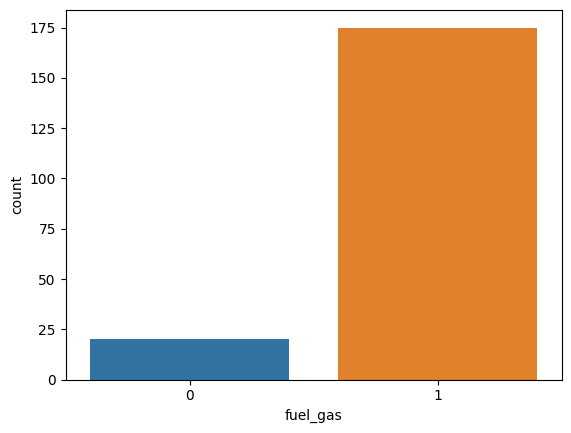

In [ ]:
sns.countplot(x = 'fuel_gas', data = df2)

By using countplot, we can observe that there are more vehicles running on gas.

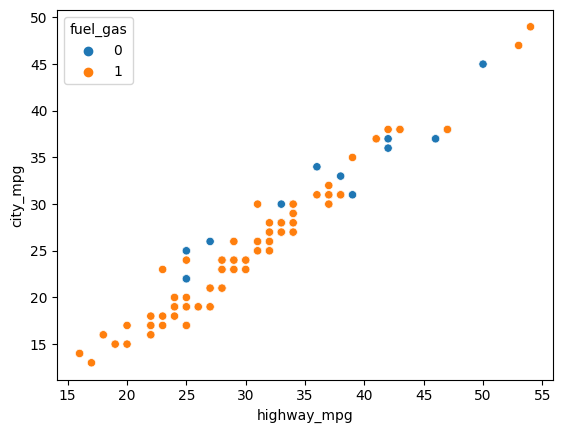

In [ ]:
#Relation between variables
sns.scatterplot(x = 'highway_mpg', y = 'city_mpg', hue = 'fuel_gas', data = df2)
plt.show()

In the above scatterplot, we compare 'city_mpg' and 'highway_mpg'. we can observe that the variables are linearly related for both gas and diesel vehicles.

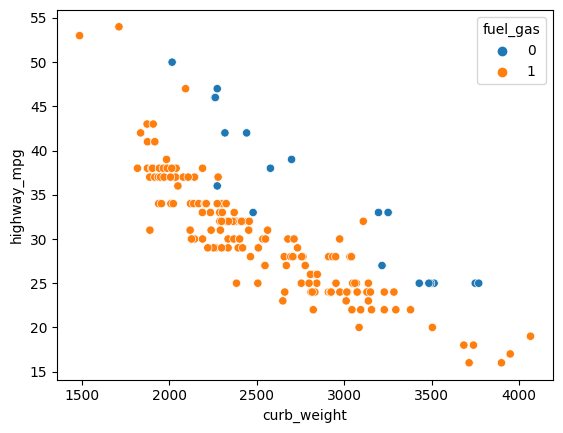

In [ ]:
sns.scatterplot(x = 'curb_weight', y = 'highway_mpg', hue = 'fuel_gas', data = df2)
plt.show()

In the above scatterplot, we compare 'curb_weight' and 'highway_mpg'. we can observe that the variables are linearly related for both gas and diesel vehicles.

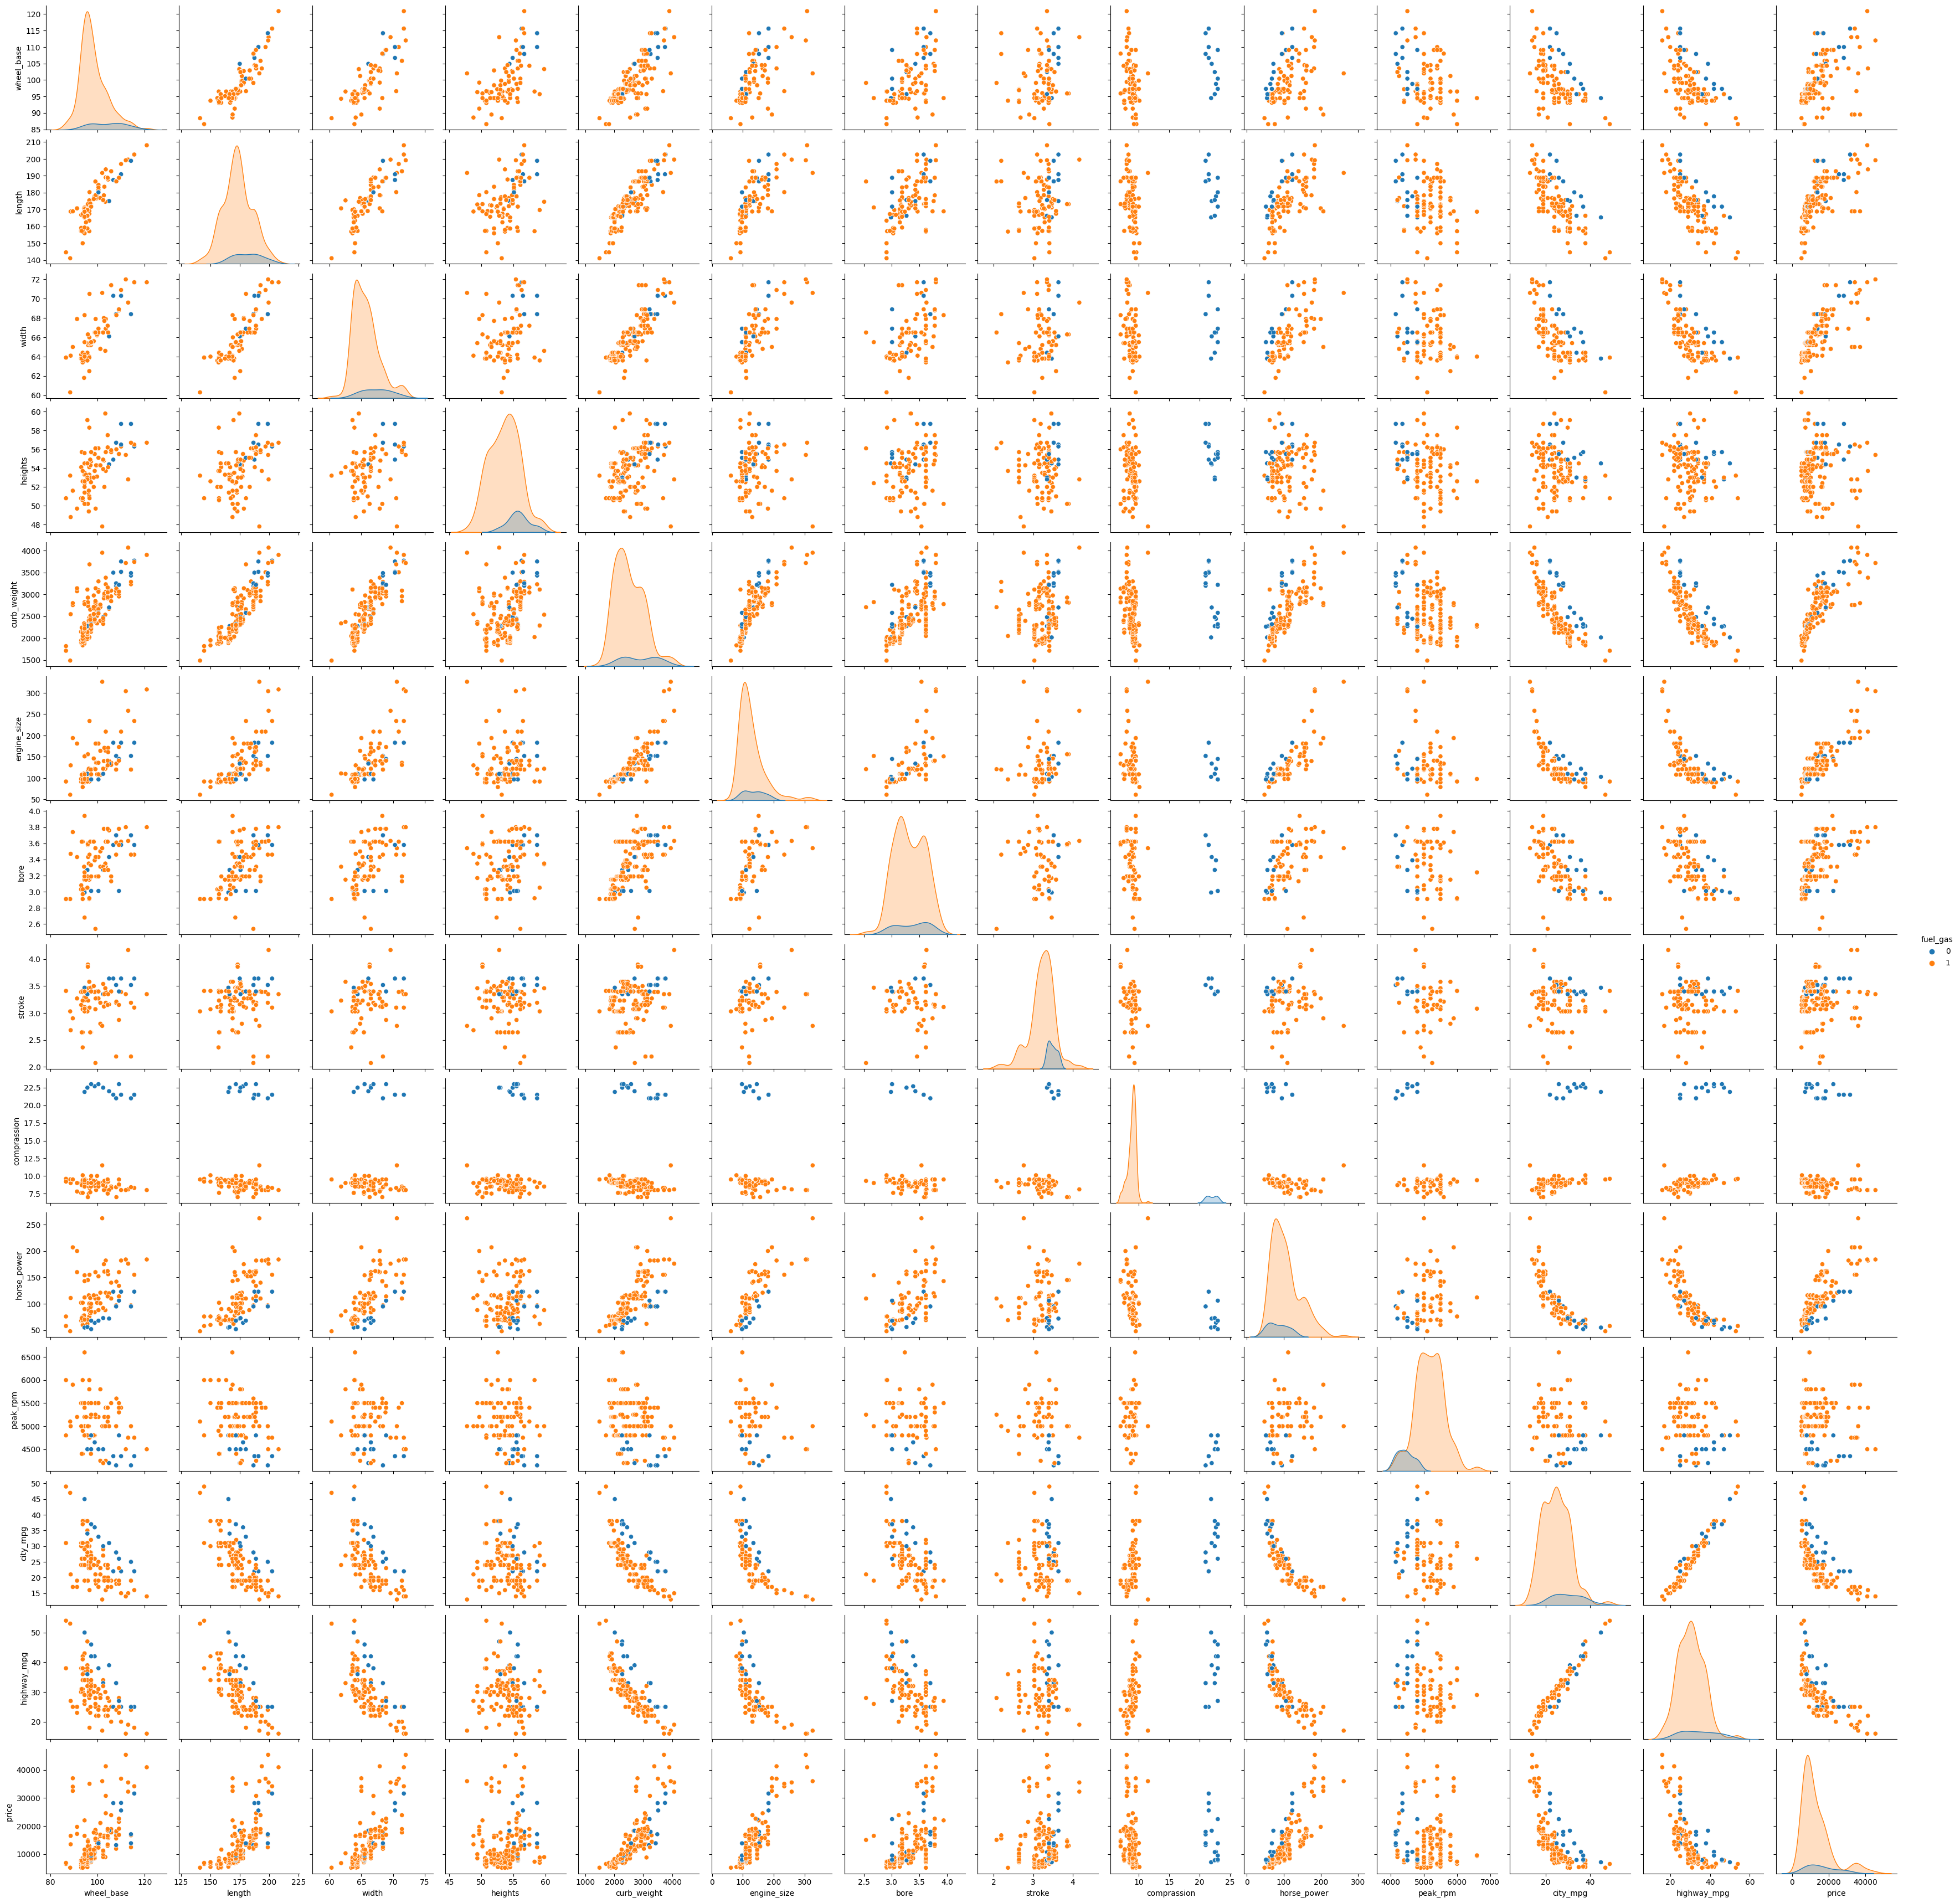

In [ ]:
sns.pairplot(df2, hue = 'fuel_gas')
plt.show()

Pairplot can be used to find the relation between all the variables in the dataset instead of coding for each variable which helps us save time.  
In the above plot we compare every feature with each other and get clear picture of spread of data in the dataset. Most plots above follows a linear pattern while few are constant. From this plot, we can see that there is a huge amount of overlapping among the features.

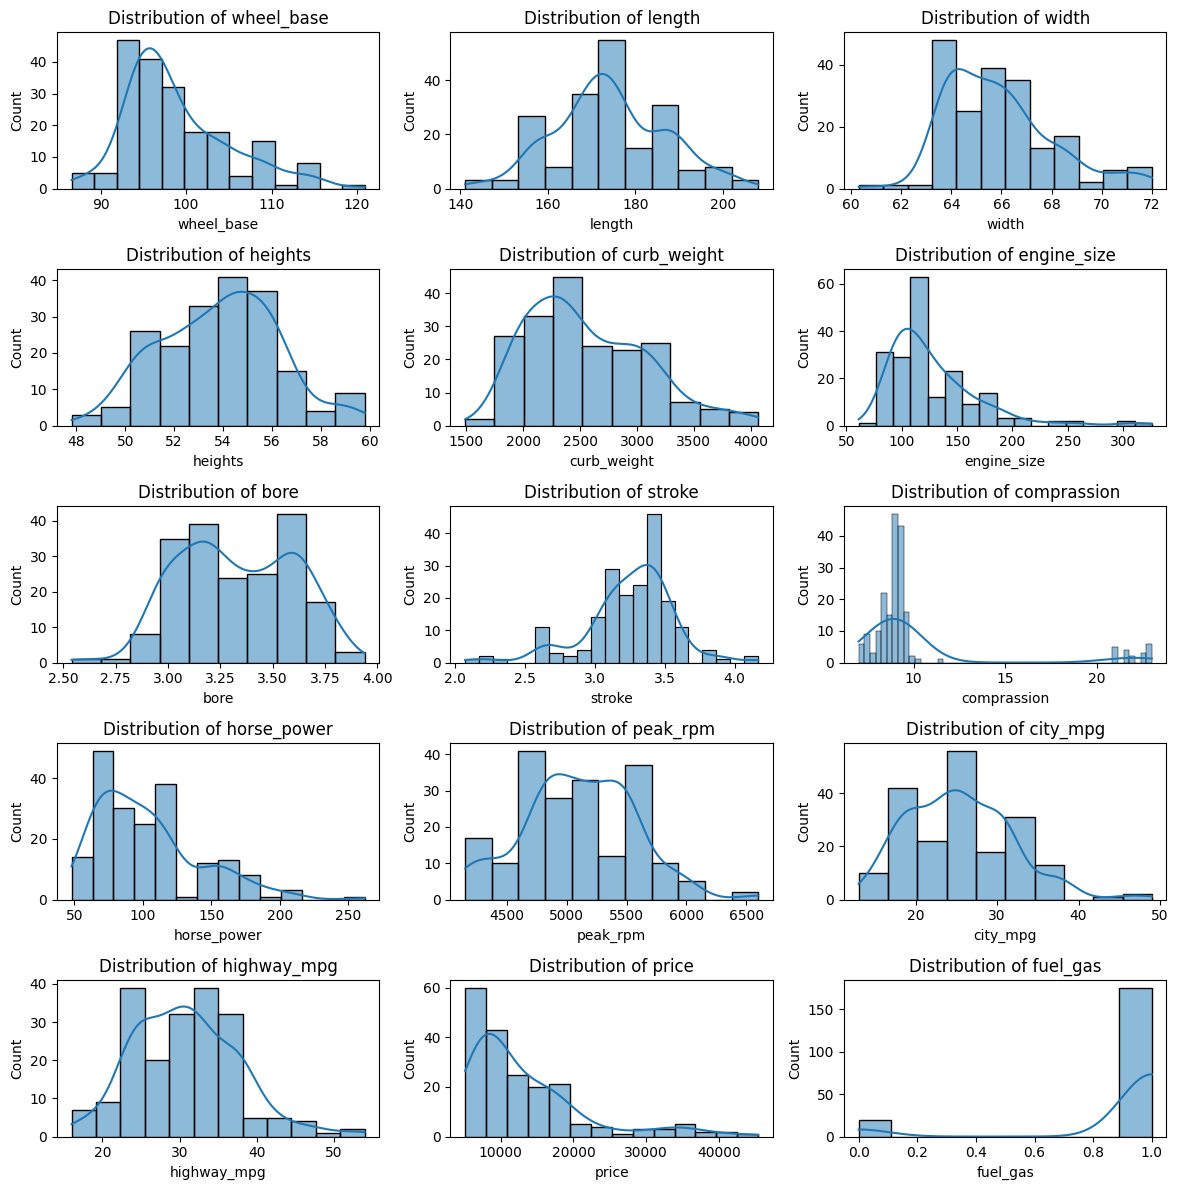

In [ ]:
plt.figure(figsize = (12,12))
for i,col in enumerate(df2.columns,1):
    plt.subplot(5, 3, i)
    sns.histplot(df2[col], kde = True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Histograms are used to represent numerical datatypes thereby giving the shape of distributions of the variables.  
In the above plot every variable except price and fuel_gas follows normal distribution with some skewness and variances. The price follows an exponential distribution.

<ipython-input-103-536df385ebab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


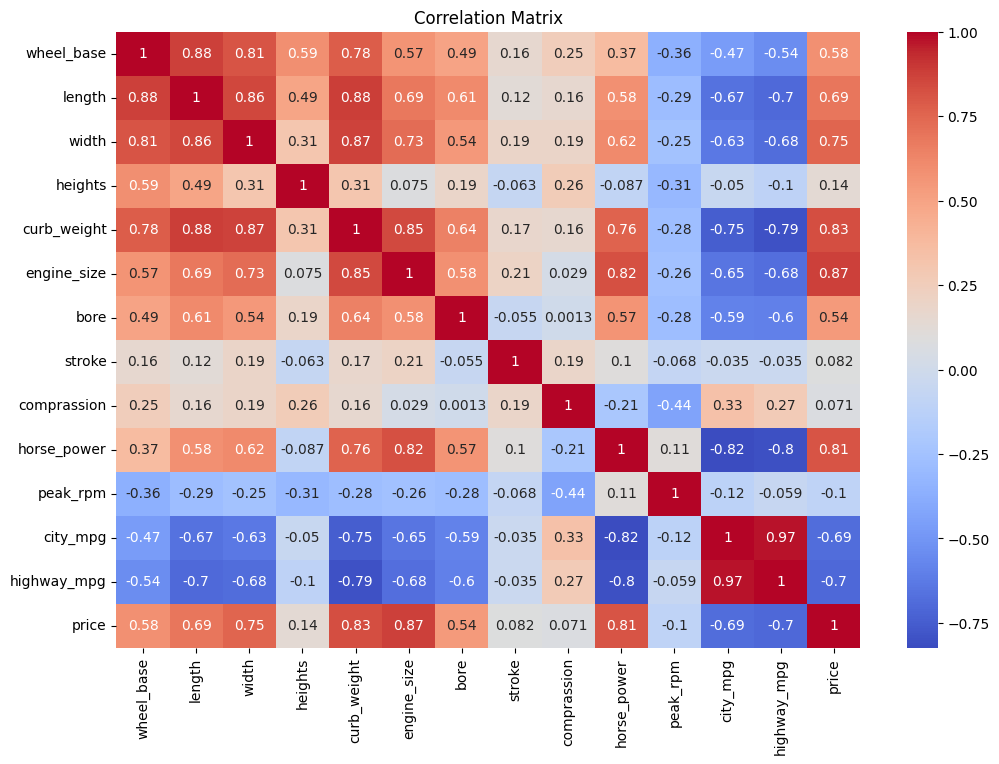

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation matrix plottted by defining the correlation matrix using .corr() method and creating a plot by using heatmap for better understanding of the data.
Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables.
Correlation values varies between (-1,1). Negative (-1) indicates a inverse realtion between two parameters, that is if one feature increases the other decreases. Positive(1) indicates a linear relation between parameters.
If correlation value is 0 then the parameters are independent.  
For example, the price and city_mpg has a negative correlation.

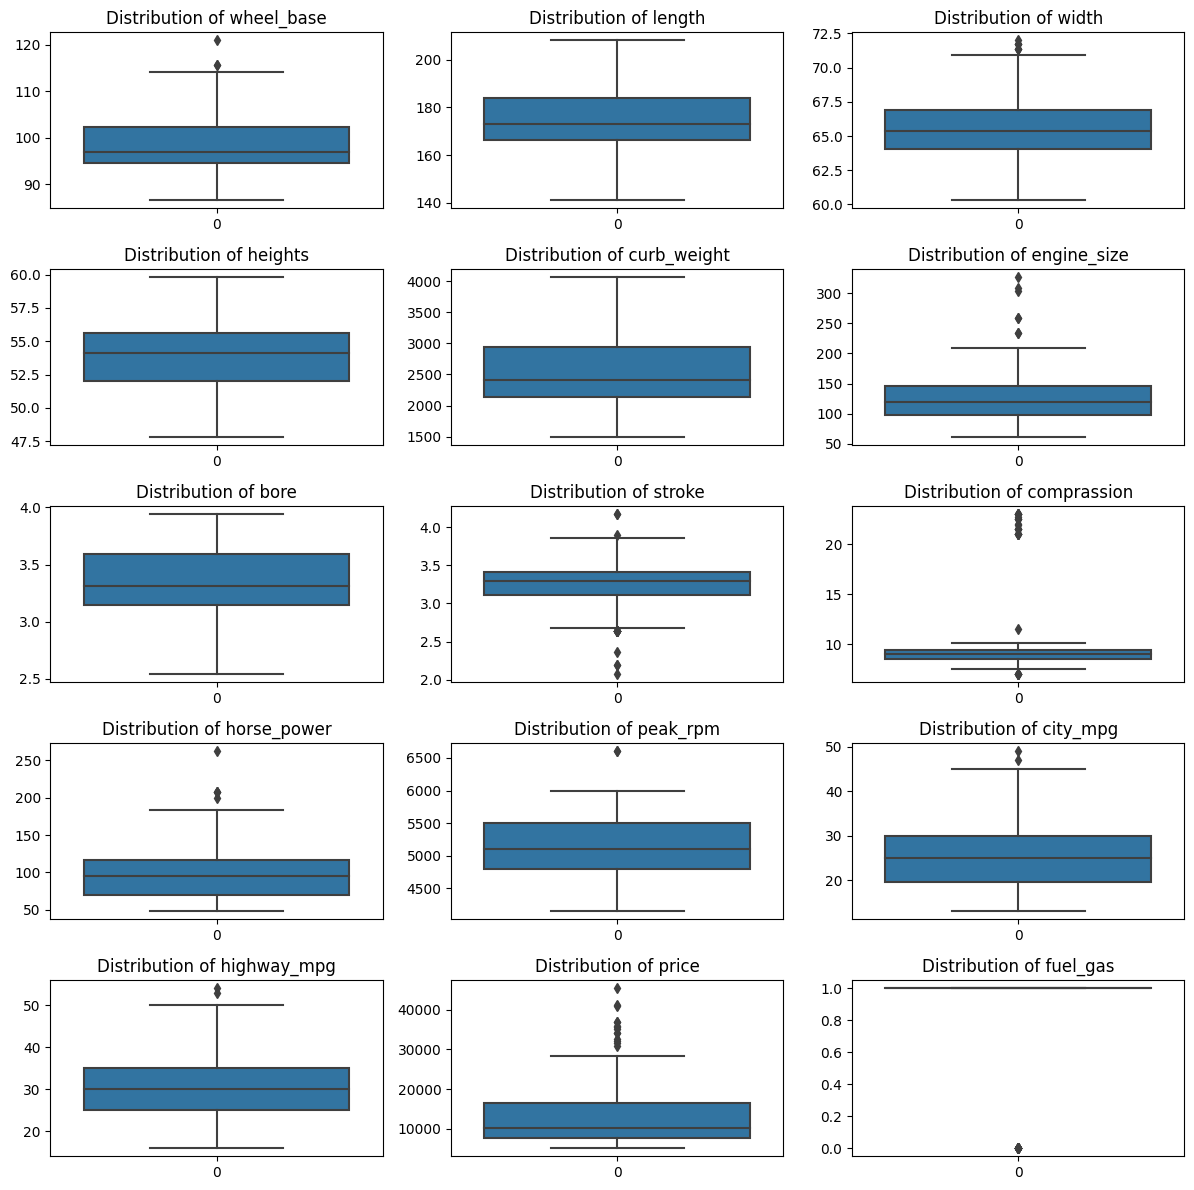

In [ ]:
plt.figure(figsize = (12,12))
for i,col in enumerate(df2.columns,1):
    plt.subplot(5, 3, i)
    sns.boxplot(df2[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

sns.boxplot is used to visual the data in the form of Box and Whisker plot.
Boxplot help us to find the outliers in the dataset.  
In the above plots we see few outliers present in the dataset. we need to eliminate them to prevent bias.

In [ ]:
outlier = df2[(df2['wheel_base'] <= 87) | (df2['wheel_base'] > 115)|(df2['length'] > 198)| (df2['width'] > 71)| (df2['curb_weight'] > 4000)| (df2['engine_size'] > 200)|(df2['stroke'] <= 2.7) |(df2['stroke'] > 4)|(df2['comprassion'] <8) |(df2['comprassion'] > 24)|(df2['horse_power'] > 198)|(df2['peak_rpm'] > 6000)|(df2['city_mpg'] > 46)|(df2['highway_mpg'] > 50)| (df2['price'] > 24500)]
df2_filter = df2.drop(outlier.index)
print(df2.shape)
print(df2_filter.shape)

(195, 15)
(133, 15)


The dataframe df2 is cleared of outliers.

In [ ]:
df2 = df2_filter

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [ ]:
y = df2['price']
x = df2.drop(columns=['price'])
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
print(model1.summary())
intercept = model1.params['const']
print("Intercept:", intercept)

residuals1= model1.resid
residual_variance = residuals1.var()
print("Residual Variance:",residual_variance)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     40.70
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.85e-38
Time:                        03:26:22   Log-Likelihood:                -1190.3
No. Observations:                 133   AIC:                             2411.
Df Residuals:                     118   BIC:                             2454.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9696.4633   1.82e+04     -0.534      

1. How do you interpret the intercept?  
A:The intercept (const) in the model is approximately -9696.4633. This value represents the estimated price when all the independent variables are set to zero.
2. How many variables are statistically significant?  
A:Variables with low P-values (typically ≤ 0.05) are considered statistically significant. In this model, the following variables are statistically significant: "width," "curb_weight," "stroke," "comprassion," "horse_power," and "city_mpg."
3. What is the variance of the model?  
A:Residual Variance: 3501254.91.This value measures the unexplained variability in the dependent variable (price) that the model does not account for.
4. What is the coefficeint of determination and how do you interpret it?  
A: The R-squared value is 0.828, which means that approximately 82% of the variance in the dependent variable "price" is explained by the independent variables in the model. In other words, the model accounts for 82% of the variability in car prices.
5. What is the F-statistics used for? How do you interpret it for this model?  
The F-statistic is 40.70, and the associated p-value (Prob (F-statistic)) is 1.85e-38. The F-statistic tests the overall significance of the model. In this context, it checks whether at least one of the independent variables is related to the dependent variable. The very low p-value indicates that the model is statistically significant.  
The F-statistic tests whether the model as a whole provides a better fit than a model with no independent variables. In this case, the low p-value suggests that at least one independent variable in your model is significantly associated with the price of the cars.

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow.

In [ ]:
non_significant_vars = model1.pvalues[model1.pvalues >= 0.1].index
x2 = x.drop(columns=non_significant_vars)

model2 = sm.OLS(y, sm.add_constant(x2)).fit()
print(model2.summary())
Intercept = model2.params['const']
print("Intercept:", Intercept)
residuals2= model2.resid
Residual_variance = residuals2.var()
print("Residual Variance:",Residual_variance)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     96.07
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.39e-37
Time:                        03:26:22   Log-Likelihood:                -1215.3
No. Observations:                 133   AIC:                             2441.
Df Residuals:                     128   BIC:                             2455.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.092e+04   6875.655     -4.497      

1. How do you interpret the intercept?  
A:The intercept (const) in the model is approximately -30,919.49. This value represents the estimated price when all the independent variables are set to zero.
2. How many variables are statistically significant?  
A: In this model, all the independent variables, except "city_mpg," are statistically significant.
3. What is the variance of the model?  
A: Residual Variance: 5099397.207.This value measures the unexplained variability in the dependent variable (price) that the model does not account for.
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value.  
A: The R-squared value is 0.750, which means that approximately 80.6% of the variance in the dependent variable "price" is explained by the independent variables in the model. In other words, the model accounts for 75% of the variability in car prices.
5. What is the F-statistics used for? How do you interpret it for this model?  
A: The F-statistic is 96.07, and the associated p-value (Prob (F-statistic)) is 1.39e-37. This F-statistic tests the overall significance of the model.  
The F-statistic checks whether the model as a whole provides a better fit than a model with no independent variables. In this case, the very low p-value suggests that at least one independent variable in your model is significantly associated with the price of the cars.

**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [ ]:
f_stat, p = stats.f_oneway(model1.resid, model2.resid)
print("F-statistic: ", f_stat)
print("P-value: ", p)
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the models.")

F-statistic:  1.5763968924665016e-26
P-value:  1.0
Fail to reject the null hypothesis: There is no significant difference between the models.


Conclusion: Based on the F-statistic and p-value, we "fail to reject the null hypothesis." This means that we do not have enough evidence to conclude that there is a significant difference between the two models. Therefore, we can consider the simpler model (model2) as it provides a similar level of fit to the data without the non-significant variables.

In summary, the F-test suggests that there is no significant difference between the two models, and we can choose the more simplified model (model2) without the non-significant variables.




**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

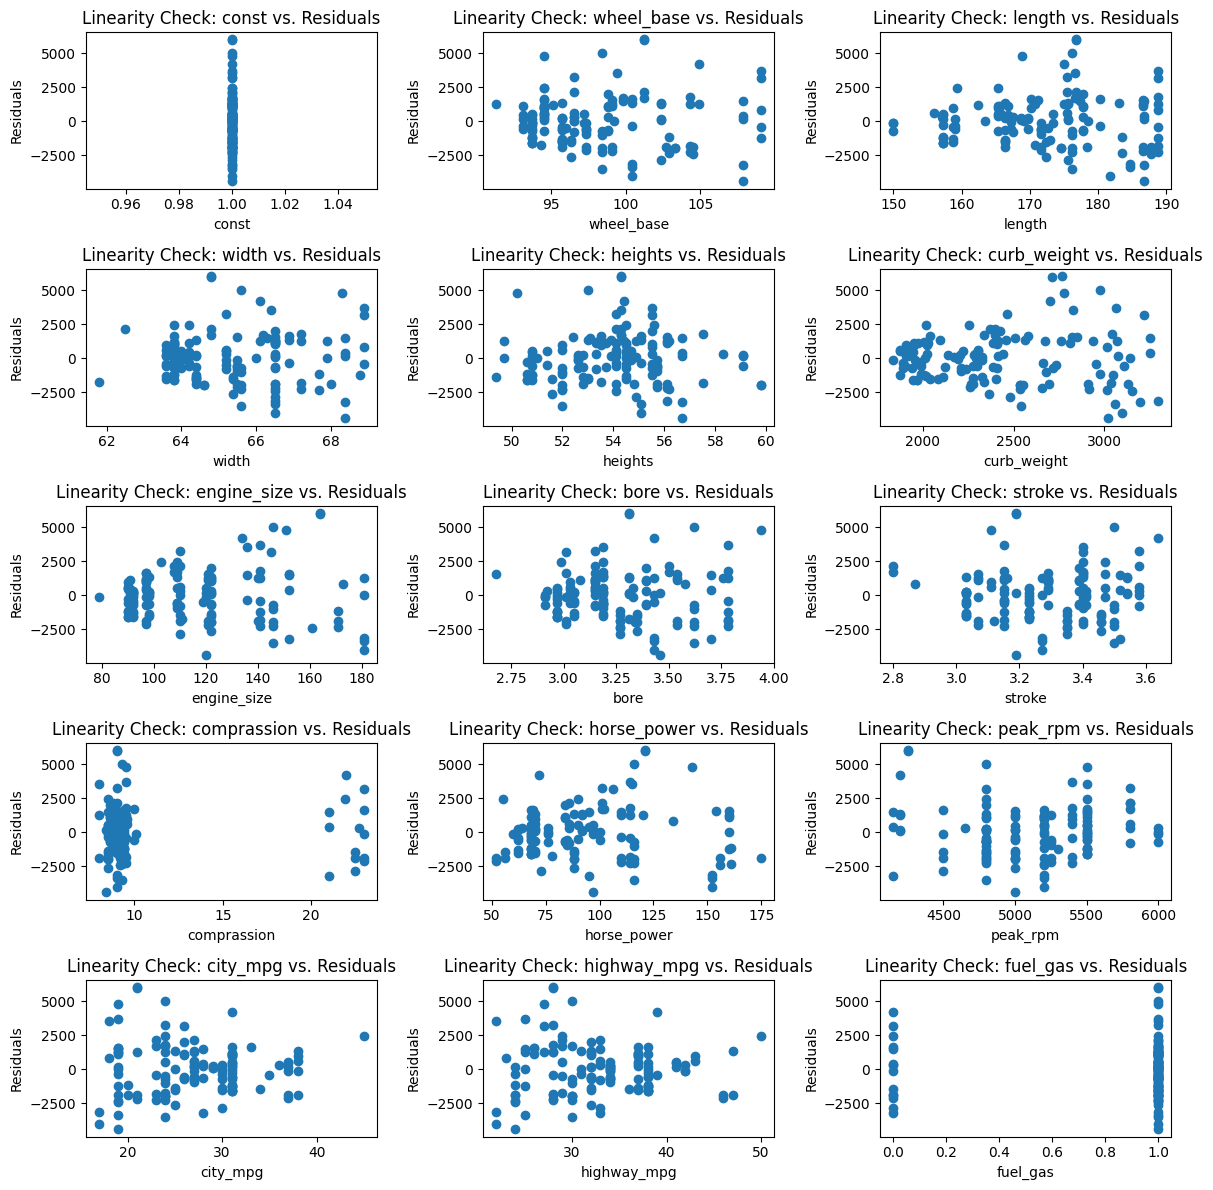

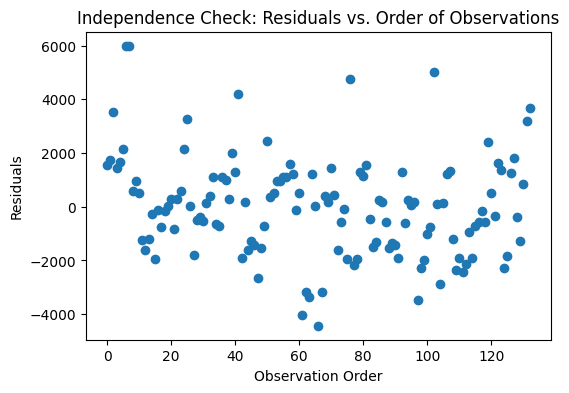

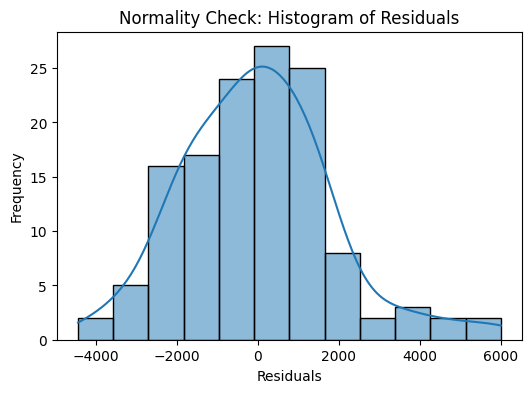

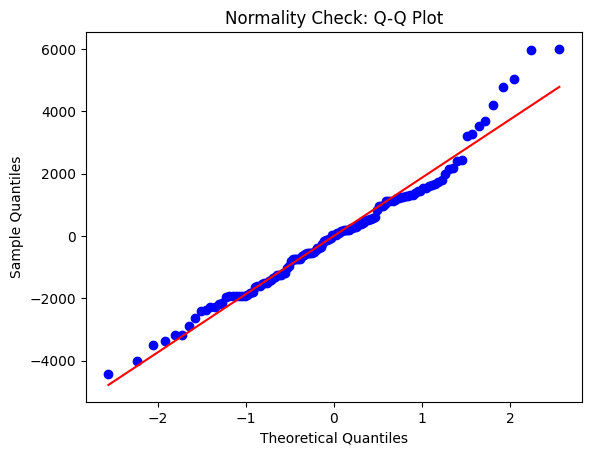

Shapiro-Wilk Test: Statistic = 0.9715687036514282, p-value = 0.006874605547636747


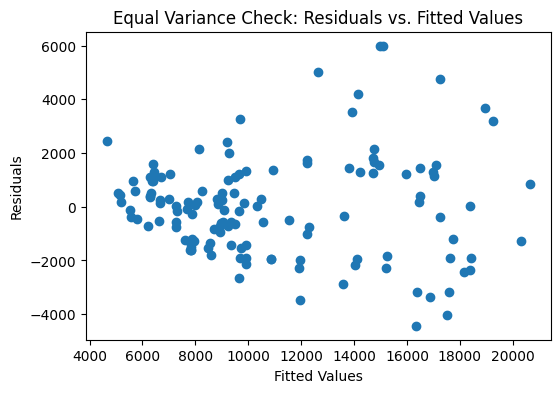

In [ ]:

# 1. Linearity:
# Create scatterplots of the dependent variable against each independent variable
plt.figure(figsize=(12, 12))
for i,column in enumerate(x.columns,1):
    plt.subplot(5,3,i)
    plt.scatter(x[column], model1.resid)
    plt.xlabel(column)
    plt.ylabel("Residuals")
    plt.title(f"Linearity Check: {column} vs. Residuals")
plt.tight_layout()
plt.show()

# 2. Independence of Residuals:
# Create a scatterplot of residuals against the order of observations
plt.figure(figsize=(6, 4))
plt.scatter(range(len(model1.resid)), model1.resid)
plt.xlabel("Observation Order")
plt.ylabel("Residuals")
plt.title("Independence Check: Residuals vs. Order of Observations")
plt.show()

# 3. Normal Distribution of Residuals:
# Create a histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(model1.resid, kde = True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality Check: Histogram of Residuals")
plt.show()

# Create a Q-Q plot to compare residuals to a normal distribution
stats.probplot(model1.resid, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Normality Check: Q-Q Plot")
plt.show()

# Perform a normality test (Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(model1.resid)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, p-value = {shapiro_p}")

# 4. Equal Variance (Homoscedasticity):
# Create a scatterplot of residuals against predicted values
plt.figure(figsize=(6, 4))
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Equal Variance Check: Residuals vs. Fitted Values")
plt.show()


**Assumptions**
1. Linearity assumption:The linearity assumption implies that the relationship between the independent variables and the dependent variable is linear.The variables are non-linear that means it needs to undergo data transformation.
2. Independence of Residuals: The independence assumption assumes that the residuals (the differences between observed and predicted values) are independent of each other. There are no visible pattern. Hence this assumption holds.
3. Normal Distribution of Residuals: The normality assumption states that the residuals should be approximately normally distributed. The above plot is normal with slight variance. Hence this assumption holds.
4.Equal Variance (Homoscedasticity): The equal variance assumption (homoscedasticity) suggests that the spread of residuals should be roughly consistent across all levels of the independent variables. There is a presence of non-constant variance also known as Heteroscedasticity.

**5. Is there Multicollinearity in your data?**

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
print(vif)

       Variable           VIF
0         const  11209.137136
1    wheel_base      5.276174
2        length      7.144645
3         width      5.007289
4       heights      2.003970
5   curb_weight     11.296955
6   engine_size      9.590229
7          bore      2.876293
8        stroke      1.395473
9   comprassion    133.310077
10  horse_power      8.276295
11     peak_rpm      1.960609
12     city_mpg     26.353157
13  highway_mpg     22.781360
14     fuel_gas    133.145503


All the variables except heights,bore,stroke,peak_rpm have high vif values(>5). This indicates potential multicollinearity.